In [3]:
import pandas as pd
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df.iloc[:,2:]

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


train test split 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.25) 

In [13]:
x_train.shape


(300, 2)

In [14]:
y_train


189    0
7      1
59     0
44     0
350    1
      ..
320    1
128    0
313    1
42     0
74     0
Name: Purchased, Length: 300, dtype: int64

Standard scalar

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [16]:
scalar.fit(x_train)

StandardScaler()

In [18]:
x_train_scaled=scalar.transform(x_train)


In [19]:
x_test_scaled=scalar.transform(x_test)

In [20]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [21]:
x_train

,Age,EstimatedSalary
189,28,32000
7,32,150000
59,32,117000
44,28,84000
350,38,113000
...,...,...
320,52,138000
128,30,17000
313,49,141000
42,35,108000


In [22]:
x_train_scaled

,Age,EstimatedSalary
0,-0.904928,-1.065564
1,-0.520125,2.421306
2,-0.520125,1.446164
3,-0.904928,0.471023
4,0.057079,1.327965
...,...,...
295,1.403889,2.066709
296,-0.712527,-1.508810
297,1.115287,2.155358
298,-0.231523,1.180217


In [23]:
x_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.406667,68060.000000
std,10.412301,33897.786552
min,18.000000,15000.000000
25%,30.000000,42000.000000
50%,37.000000,65000.000000
75%,45.250000,86000.000000
max,60.000000,150000.000000


In [24]:
x_train_scaled.describe()


,Age,EstimatedSalary
count,3.000000e+02,3.000000e+02
mean,2.960595e-17,-1.184238e-17
std,1.001671e+00,1.001671e+00
min,-1.866935e+00,-1.567909e+00
25%,-7.125267e-01,-7.700663e-01
50%,-3.912163e-02,-9.042221e-02
75%,7.545343e-01,5.301224e-01
max,2.173495e+00,2.421306e+00


In [26]:
import numpy as np 
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.0,-0.1
75%,0.8,0.5
max,2.2,2.4


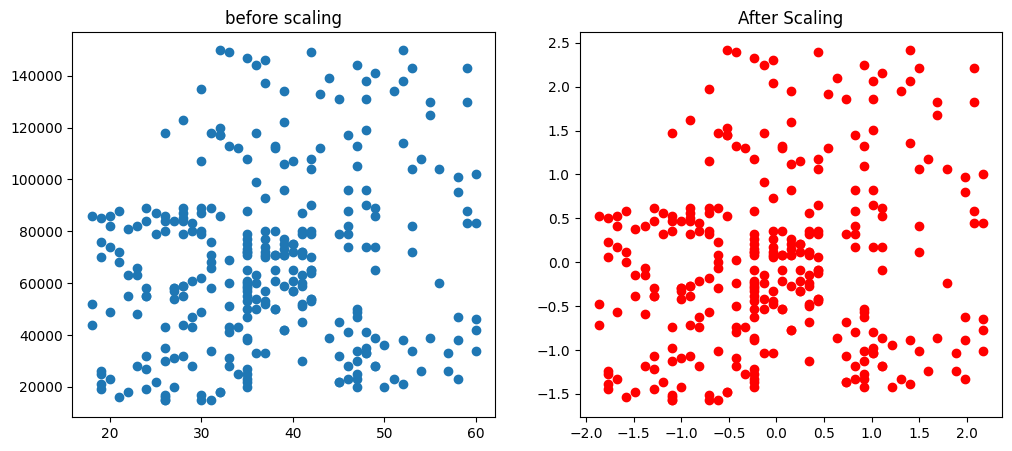

In [28]:
import matplotlib.pyplot as plt
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("before scaling")

ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color="red")
ax2.set_title("After Scaling")
plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

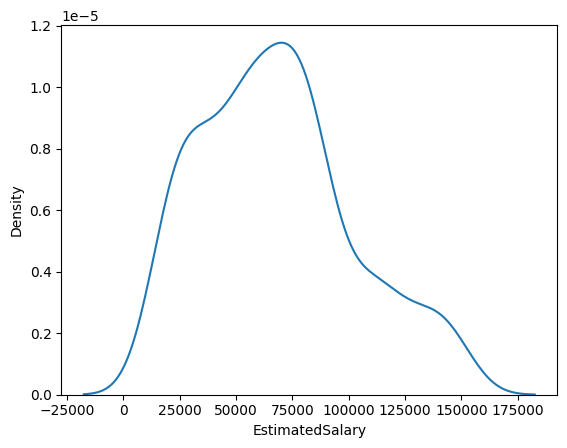

In [31]:
import seaborn as sns 
sns.kdeplot(x_train["EstimatedSalary"])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

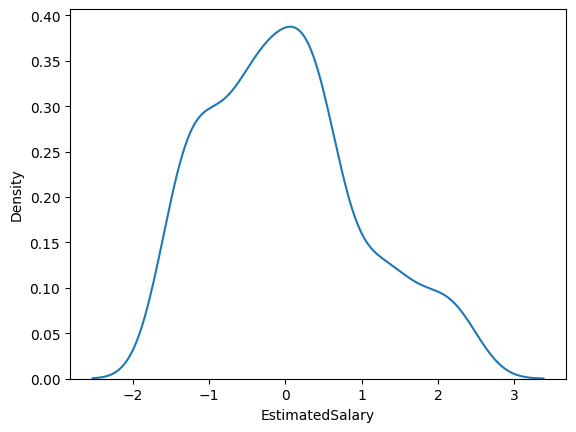

In [32]:
sns.kdeplot(x_train_scaled["EstimatedSalary"])

min max scaler 

In [34]:
from sklearn.preprocessing import  MinMaxScaler
scaler_min_max=MinMaxScaler()

In [35]:
scaler_min_max.fit(x_train)

MinMaxScaler()

In [40]:
x_train_minmax=scaler_min_max.transform(x_train)

In [41]:
x_test_minmax=scaler_min_max.transform(x_test)

In [47]:
x_train_minmax=pd.DataFrame(x_train_minmax,columns=x_train.columns)

In [48]:
x_test_minmax=pd.DataFrame(x_test_minmax,columns=x_test.columns)

In [49]:
x_train_minmax

,Age,EstimatedSalary
0,0.238095,0.125926
1,0.333333,1.000000
2,0.333333,0.755556
3,0.238095,0.511111
4,0.476190,0.725926
...,...,...
295,0.809524,0.911111
296,0.285714,0.014815
297,0.738095,0.933333
298,0.404762,0.688889


In [50]:
x_test_minmax

,Age,EstimatedSalary
0,0.523810,0.414815
1,0.452381,0.466667
2,0.738095,0.155556
3,0.119048,0.037037
4,0.523810,0.325926
...,...,...
95,0.000000,0.496296
96,0.547619,0.274074
97,0.500000,0.474074
98,0.261905,0.503704


In [44]:
x_train.describe()


,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.406667,68060.000000
std,10.412301,33897.786552
min,18.000000,15000.000000
25%,30.000000,42000.000000
50%,37.000000,65000.000000
75%,45.250000,86000.000000
max,60.000000,150000.000000


In [51]:
np.round(x_train_minmax.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.6,0.5
max,1.0,1.0


In [52]:
np.round(x_test_minmax.describe(),1)

,Age,EstimatedSalary
count,100.0,100.0
mean,0.5,0.4
std,0.3,0.3
min,0.0,0.0
25%,0.3,0.3
50%,0.5,0.4
75%,0.7,0.6
max,1.0,1.0


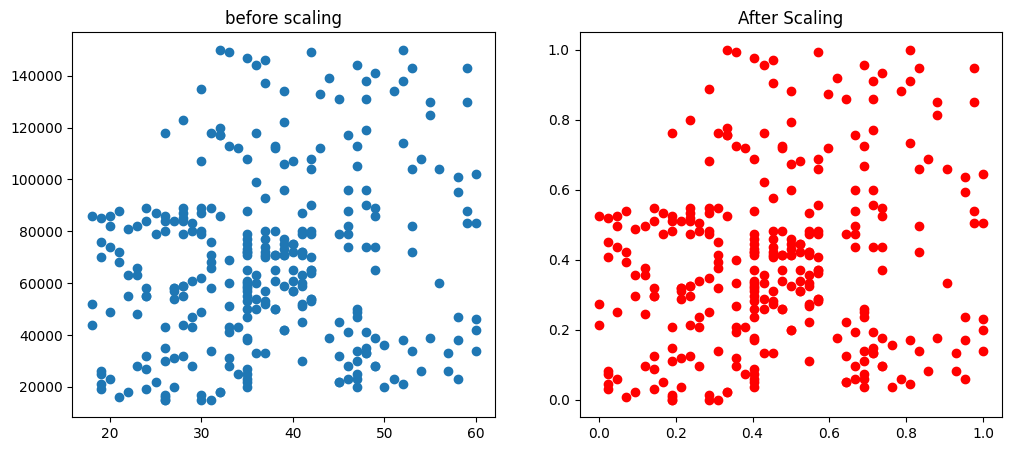

In [53]:

import matplotlib.pyplot as plt
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("before scaling")

ax2.scatter(x_train_minmax["Age"],x_train_minmax["EstimatedSalary"],color="red")
ax2.set_title("After Scaling")
plt.show()

ENCODING 